In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('src/gemastik24-data-mining/datasets/breast-cancer.csv') # Ubah sesuai dengan lokasi relatif file breast-cancer.csv
df.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,BC,>= 50,Senior high school,Housewife,Marriage,12 to 13,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Obesity,Minangnese
1,Non-BC,>= 50,Vocational degree,Master's student,Single/ widow,>13,< 50 years,>30 years,>= Multiparous,<12 months,High,Normal,Minangnese
2,BC,>= 50,Senior high school,Housewife,Marriage,7 to 11,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Normal,Javanese
3,Non-BC,>= 50,Senior high school,Master's student,Marriage,12 to 13,< 50 years,20-29 years,Primiparous,>=12 months,High,Normal,Javanese
4,BC,>= 50,Senior high school,Private servant,Marriage,>13,< 50 years,20-29 years,>= Multiparous,>=12 months,High,Normal,Minangnese


## Exploratory Data Analysis

### Plot Semua Fitur berdasarkan `Grouping`

In [3]:
def plot_group(data, columns, rows, cols):
	fig, axes = plt.subplots(rows, cols, figsize=(20, rows*5))
	axes = axes.flatten()

	for i, col in enumerate(columns):
		sns.countplot(data=data, x=col, hue='Grouping', ax=axes[i], palette='coolwarm')
		axes[i].set_title(f'Perbandingan {col} dengan Grouping', fontsize=15)
		axes[i].set_xlabel(col, fontsize=12)
		axes[i].set_ylabel('Jumlah', fontsize=12)
		axes[i].tick_params(labelrotation=45)

		for ax in axes[len(columns):]:
			ax.remove()
		plt.tight_layout()

C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudyh\AppData\Local\Temp\ipykernel_11008\2620572509.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rudy

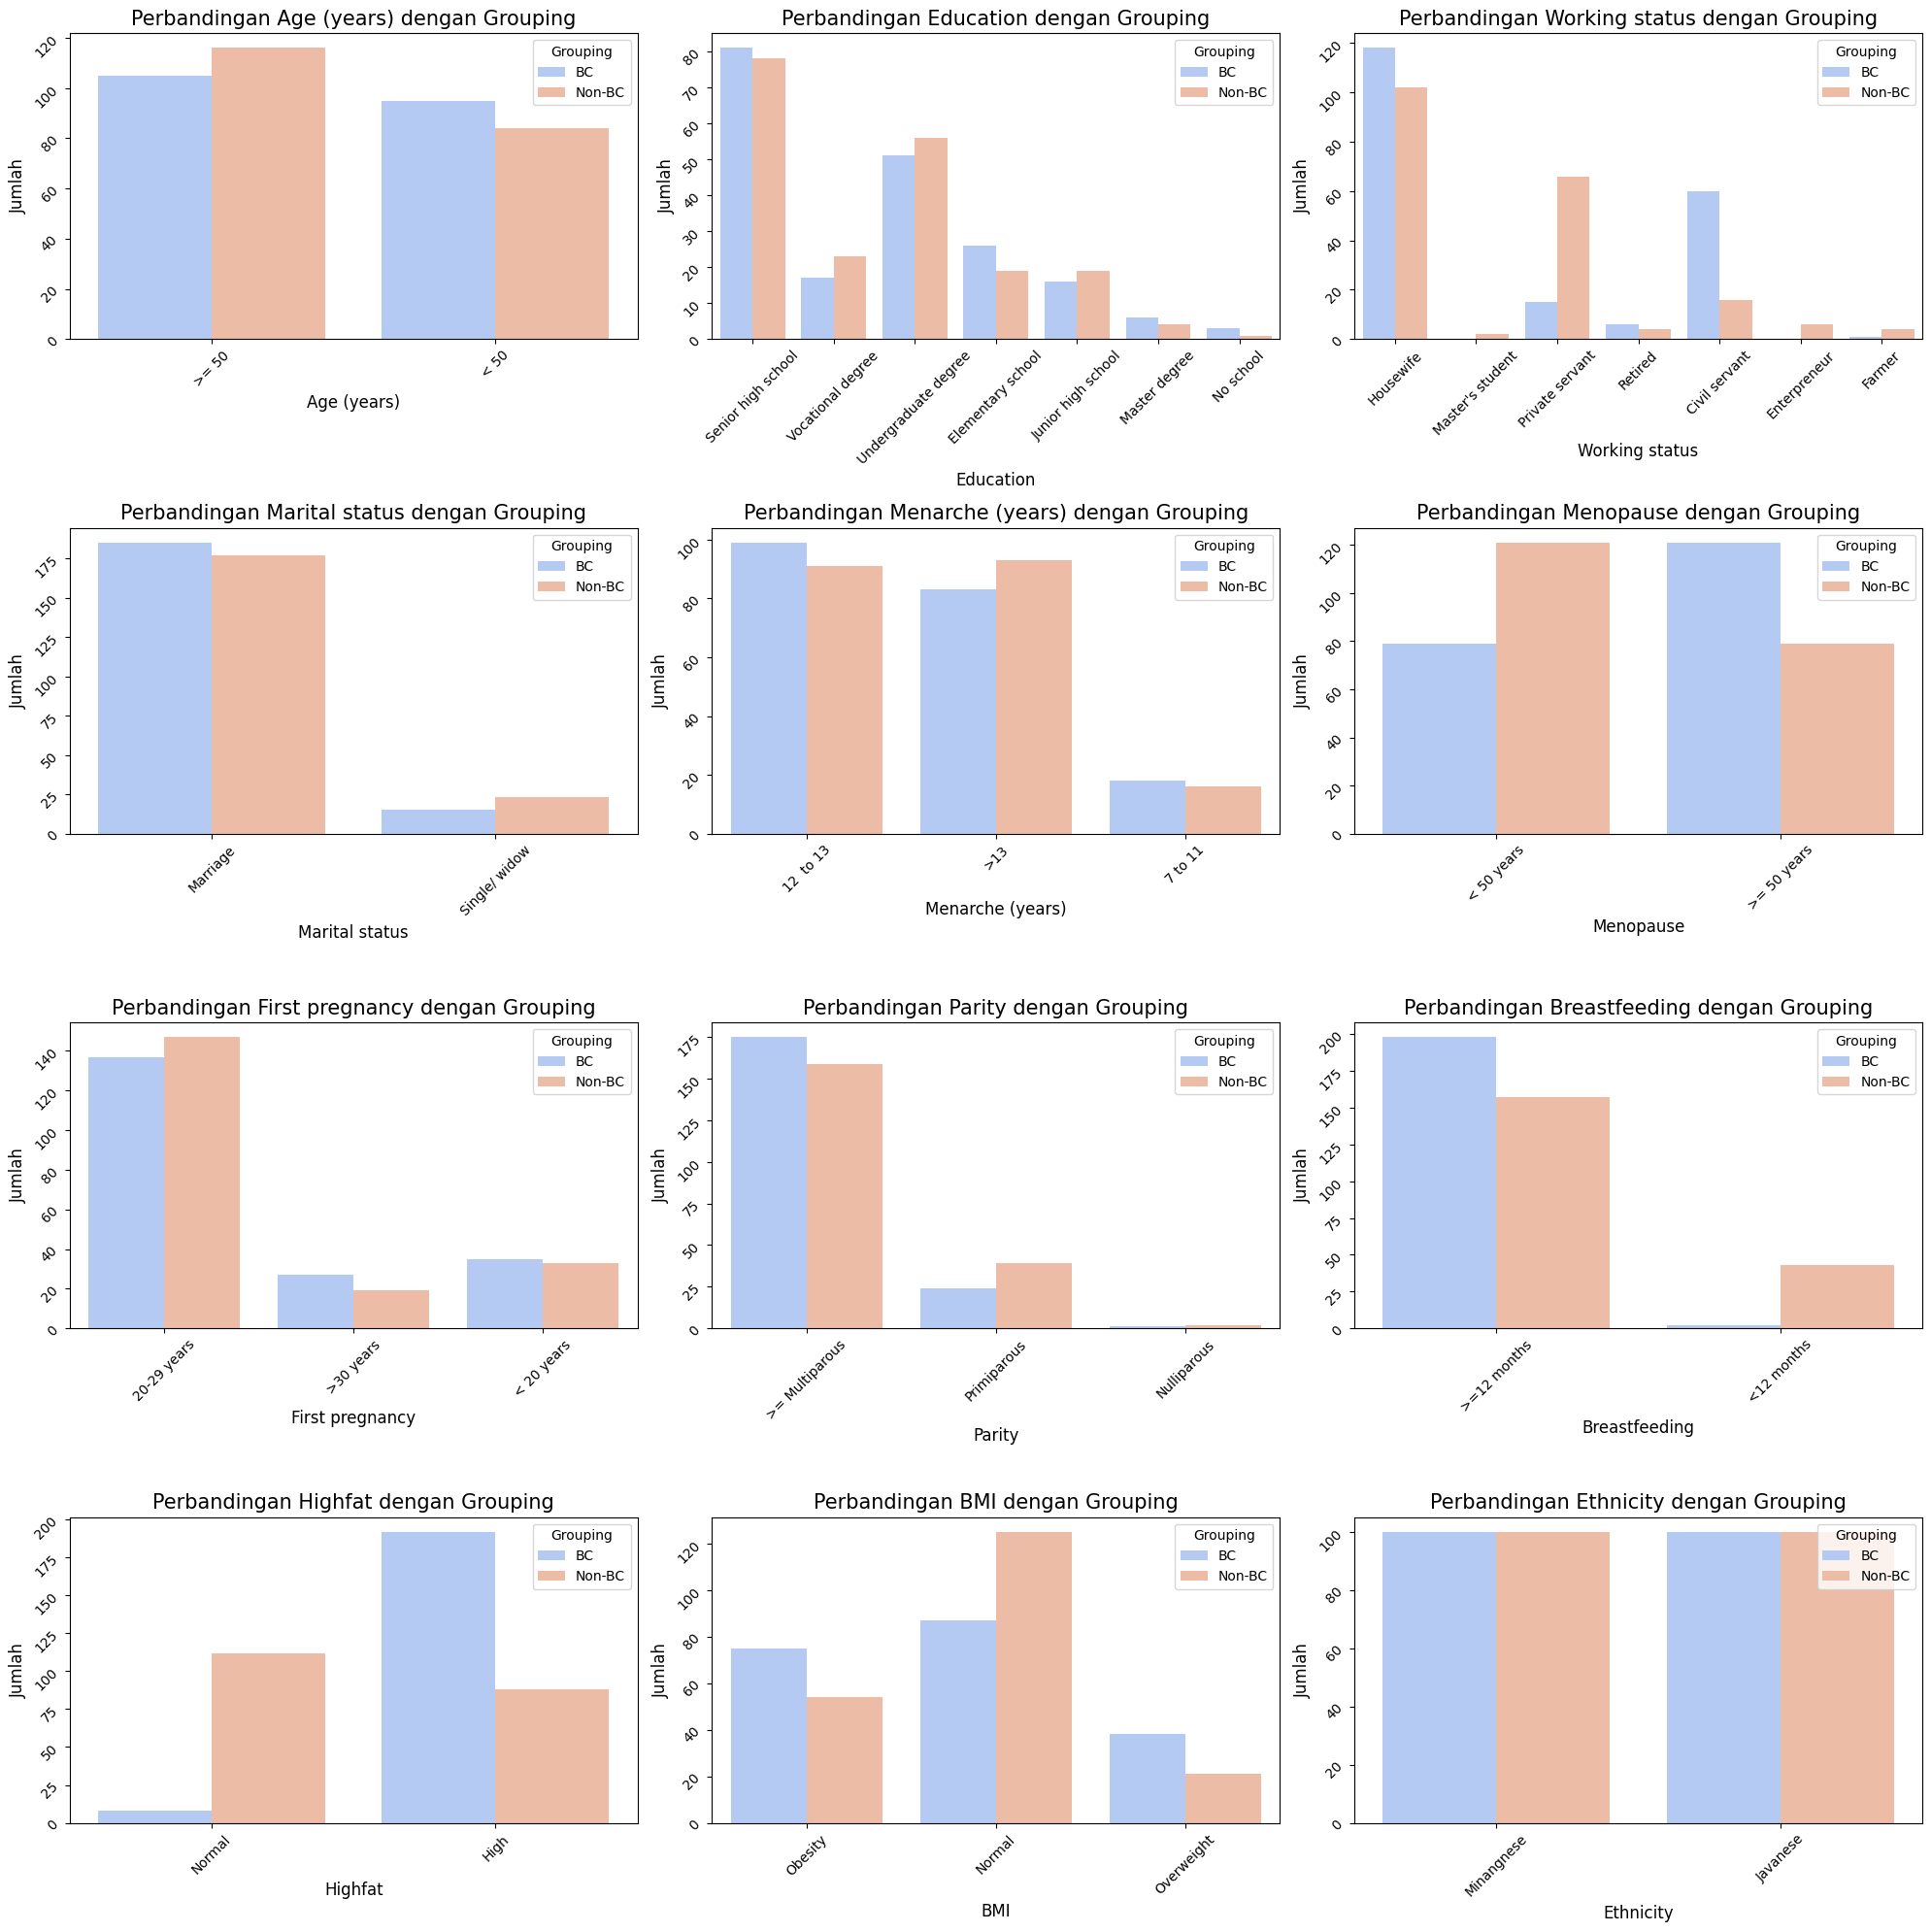

In [4]:
# Plot
plot_columns = df.columns.drop('Grouping')
plot_group(df, plot_columns, 4, 3)

## Feature Engineering

### 1. Feature Selection Using Chi-Square Test

The Chi-square test is a statistical test that's used to determine if there's a significant association between two categorical variables in a sample. It's based on the difference between the observed frequencies in each category of a cross-tabulation, and the frequencies that we would expect to get by chance alone.

The test calculates a statistic that follows a Chi-square distribution, which is where it gets its name. The degrees of freedom for the test are determined by the number of categories in each variable.

The null hypothesis for the test is that the variables are independent, and the alternative hypothesis is that they are not independent. If the p-value of the test is less than the chosen significance level (often 0.05), then we reject the null hypothesis and conclude that there is a significant association between the variables.

### 2. Feature Selection Using Feature Importance (Random Forest)

Feature importance in a Random Forest model refers to the average contribution of each feature in improving the predictions made by the model. It's a measure of how much the model's predictions depend on each feature.

Random Forest calculates feature importance based on the decrease in node impurity, which is weighted by the probability of reaching that node (which is approximated by the number of samples that reach the node). The higher the value, the more important the feature.

In other words, a feature has a high importance if it significantly improves the predictive accuracy of the model, and a low importance if it doesn't contribute much to the model's accuracy, or even decreases it.

Here's how you can get feature importance from a Random Forest model in Python using the `sklearn` library:

```python
from sklearn.ensemble import RandomForestClassifier

# Assume X is your feature matrix and y are your labels
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')
```

## Feature Importance (Random Forest)

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Grouping  Age (years)  Education  Working status  Marital status  \
0         0            1          4               3               0   
1         1            1          6               4               1   
2         0            1          4               3               0   
3         1            1          4               4               0   
4         0            1          4               5               0   

   Menarche (years)  Menopause  First pregnancy  Parity  Breastfeeding  \
0                 0          0                0       0              1   
1                 2          0                2       0              0   
2                 1          0                0       0              1   
3                 0          0                0       2              1   
4                 2          0                0       0              1   

   Highfat  BMI  Ethnicity  
0        1    1          1  
1        0    0          1  
2        1    0          0  
3        0  

### Feature Selection using Random Forest

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Split data into features and target
X = df.drop('Grouping', axis=1)
y = df['Grouping']

# Train classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and get indices of top 6 features
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 5
top_features = sorted_indices[:top_n]

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.040351381068212726
Feature 1: 0.11428131432539225
Feature 2: 0.15498352704532217
Feature 3: 0.0258772454296132
Feature 4: 0.067373199846954
Feature 5: 0.04424120088098058
Feature 6: 0.06033220205517256
Feature 7: 0.02811000770463414
Feature 8: 0.06294952484150672
Feature 9: 0.28170292293010674
Feature 10: 0.06910790838998387
Feature 11: 0.050689565482120974


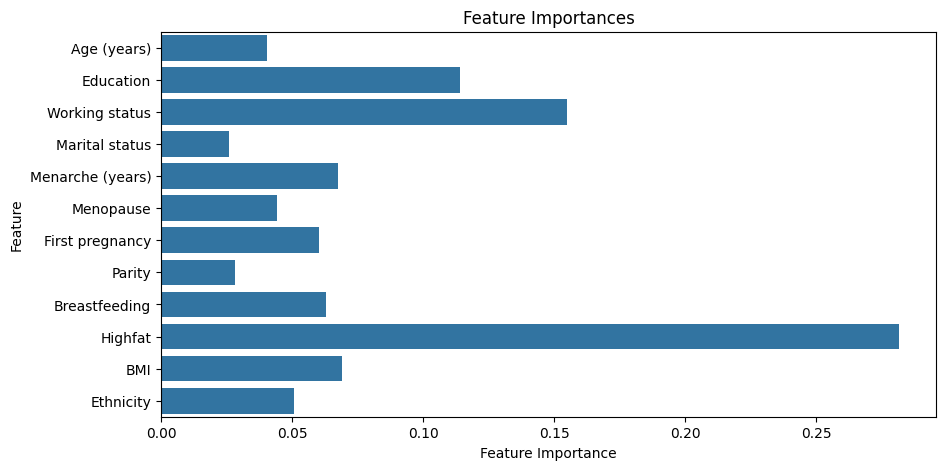

In [24]:
# Plot all features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=df.columns.drop('Grouping'))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

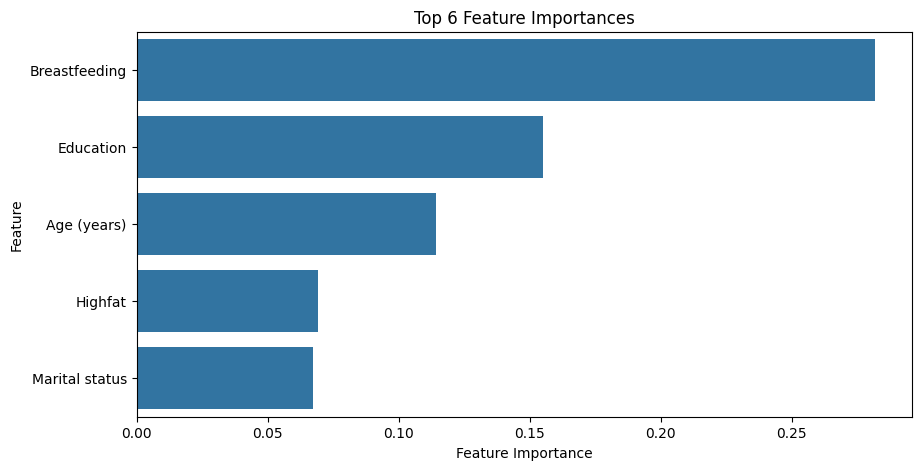

In [25]:
# Plot top 5 features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[top_features], y=df.columns[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 6 Feature Importances')
plt.show()

In [26]:
# Define feature_names
feature_names = df.drop('Grouping', axis=1).columns

# Print the top 6 features
top_feature_names = [feature_names[i] for i in top_features]
print(f"Top {top_n} features:")
for name, importance in zip(top_feature_names, feature_importances[top_features]):
    print(f"{name}: {importance}")

Top 5 features:
Highfat: 0.28170292293010674
Working status: 0.15498352704532217
Education: 0.11428131432539225
BMI: 0.06910790838998387
Menarche (years): 0.067373199846954


### Feature Selection Using Gradient Boosting Tree

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and get indices of top 6 features
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 5
top_features = sorted_indices[:top_n]

# Print feature importances
for i, importance in enumerate(feature_importances):
	print(f"Feature {i}: {importance}")

# Print the top 6 features
top_feature_names = [feature_names[i] for i in top_features]
print(f"Top {top_n} features:")

for name, importance in zip(top_feature_names, feature_importances[top_features]):
	print(f"{name}: {importance}")

Feature 0: 0.031740527197629875
Feature 1: 0.042301311835855525
Feature 2: 0.13163254905792693
Feature 3: 0.01794442296986616
Feature 4: 0.01097463066760034
Feature 5: 0.03998590657967687
Feature 6: 0.054788830841513654
Feature 7: 0.013350013037711328
Feature 8: 0.090600172899282
Feature 9: 0.5001669752599721
Feature 10: 0.04329839966716594
Feature 11: 0.023216259985799122
Top 5 features:
Highfat: 0.5001669752599721
Working status: 0.13163254905792693
Breastfeeding: 0.090600172899282
First pregnancy: 0.054788830841513654
BMI: 0.04329839966716594


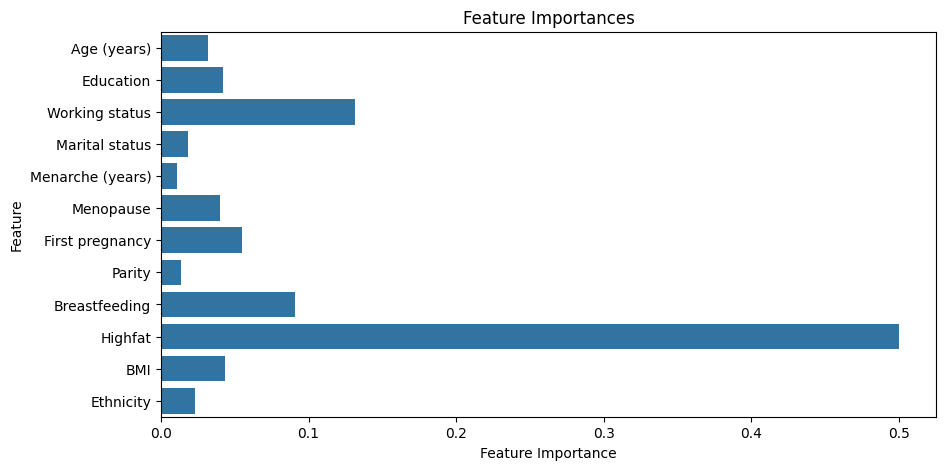

In [28]:
# Plot all features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=df.columns.drop('Grouping'))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

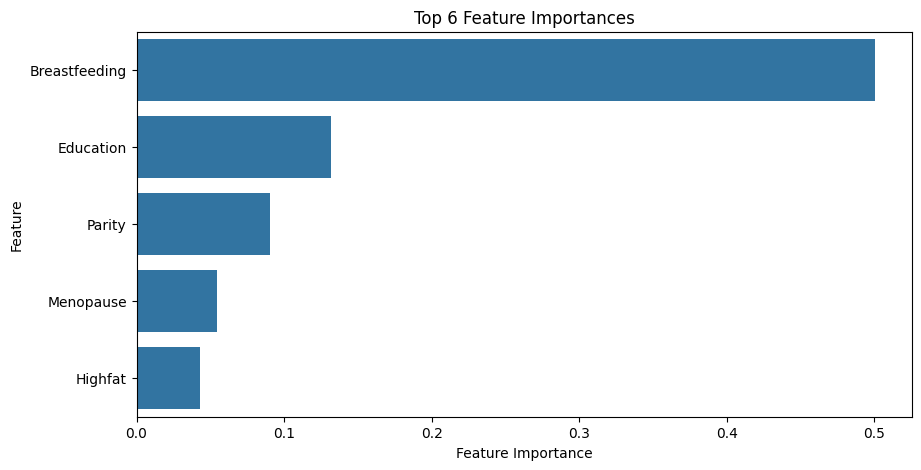

In [29]:
# Plot Top 5 features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[top_features], y=df.columns[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 6 Feature Importances')
plt.show()

### Classification with Random Forest Using Top 6 Features


In [30]:
# Separate features and target
X = df[top_feature_names].values
y = df['Grouping'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy with selected features: {accuracy}")

Accuracy with selected features: 0.8375


### Measure Results using Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Generate predictions for the test set
y_pred = clf.predict(X_test)

# Calculate the classification report
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))